In [1]:
# Import necessary libaries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from requests import get

In [2]:
from fake_useragent import UserAgent

ua1 = UserAgent()
randomHeader = {'User-Agent':str(ua1.random)}

In [3]:
# Make a request
url = 'https://covid19.ncdc.gov.ng'
response = get(url, randomHeader, headers = {"Accept-Language": "en-US, en;q=0.5"})

In [4]:
print(response.text[:500])

<!DOCTYPE html>
<html lang="en">
<meta http-equiv="content-type" content="text/html;charset=UTF-8" />
<head>
<title>NCDC Coronavirus COVID-19 Microsite</title>
<!--[if lt IE 11]>
    	<script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
    	<script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>
    	<![endif]-->
<meta charset="utf-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=0, minimal-ui">
<meta


In [5]:
# Create a beautifulsoup object
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [6]:
# Locate table
covid_table = html_soup.find('div', class_ = 'table-responsive')

In [7]:
# Scrape table headers and pass into a list
table_heading = covid_table.thead.find_all('th')
headings = []
for th in table_heading:
    headings.append(th.text)
print(headings)

['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']


In [8]:
# Scrape table rows and pass into a list
table_rows = []
for i in covid_table.tbody.find_all('tr'):
    table_rows.append(i.text.replace('\n', ' ').strip())
table_rows

['Lagos  13,438  11,298  1,964  176',
 'FCT  3,027  2,105  883  39',
 'Oyo  2,167  1,031  1,116  20',
 'Edo  1,989  701  1,220  68',
 'Rivers  1,529  485  996  48',
 'Delta  1,423  756  630  37',
 'Kano  1,400  222  1,125  53',
 'Ogun  1,174  302  850  22',
 'Kaduna  1,156  287  857  12',
 'Ondo  925  761  143  21',
 'Katsina  710  246  441  23',
 'Enugu  675  298  360  17',
 'Ebonyi  655  84  557  14',
 'Plateau  648  349  281  18',
 'Borno  599  54  510  35',
 'Gombe  546  19  505  22',
 'Kwara  535  333  188  14',
 'Bauchi  529  10  506  13',
 'Abia  479  111  365  3',
 'Imo  452  360  83  9',
 'Osun  351  242  99  10',
 'Jigawa  322  3  308  11',
 'Bayelsa  322  125  177  20',
 'Nasarawa  276  155  113  8',
 'Benue  260  210  44  6',
 'Akwa Ibom  176  52  121  3',
 'Sokoto  153  0  137  16',
 'Niger  151  32  112  7',
 'Anambra  118  41  67  10',
 'Adamawa  115  21  85  9',
 'Kebbi  88  7  74  7',
 'Ekiti  86  37  47  2',
 'Zamfara  77  1  71  5',
 'Yobe  64  3  53  8',
 'Taraba  3

In [9]:
# Format table rows for dataframe
table_rows = [i.split() for i in table_rows]
table_rows

[['Lagos', '13,438', '11,298', '1,964', '176'],
 ['FCT', '3,027', '2,105', '883', '39'],
 ['Oyo', '2,167', '1,031', '1,116', '20'],
 ['Edo', '1,989', '701', '1,220', '68'],
 ['Rivers', '1,529', '485', '996', '48'],
 ['Delta', '1,423', '756', '630', '37'],
 ['Kano', '1,400', '222', '1,125', '53'],
 ['Ogun', '1,174', '302', '850', '22'],
 ['Kaduna', '1,156', '287', '857', '12'],
 ['Ondo', '925', '761', '143', '21'],
 ['Katsina', '710', '246', '441', '23'],
 ['Enugu', '675', '298', '360', '17'],
 ['Ebonyi', '655', '84', '557', '14'],
 ['Plateau', '648', '349', '281', '18'],
 ['Borno', '599', '54', '510', '35'],
 ['Gombe', '546', '19', '505', '22'],
 ['Kwara', '535', '333', '188', '14'],
 ['Bauchi', '529', '10', '506', '13'],
 ['Abia', '479', '111', '365', '3'],
 ['Imo', '452', '360', '83', '9'],
 ['Osun', '351', '242', '99', '10'],
 ['Jigawa', '322', '3', '308', '11'],
 ['Bayelsa', '322', '125', '177', '20'],
 ['Nasarawa', '276', '155', '113', '8'],
 ['Benue', '260', '210', '44', '6'],
 [

In [10]:
# Locate index position of Akwa Ibom
def get_index(strings, substr):
    for idx, string in enumerate(strings):
        if substr in string:
            break
    return idx

In [11]:
idx = get_index(table_rows, 'Akwa')

In [12]:
# Join 'Akwa' and 'Ibom'
del table_rows[idx][1]
table_rows[idx][0] = 'Akwa Ibom'
table_rows

[['Lagos', '13,438', '11,298', '1,964', '176'],
 ['FCT', '3,027', '2,105', '883', '39'],
 ['Oyo', '2,167', '1,031', '1,116', '20'],
 ['Edo', '1,989', '701', '1,220', '68'],
 ['Rivers', '1,529', '485', '996', '48'],
 ['Delta', '1,423', '756', '630', '37'],
 ['Kano', '1,400', '222', '1,125', '53'],
 ['Ogun', '1,174', '302', '850', '22'],
 ['Kaduna', '1,156', '287', '857', '12'],
 ['Ondo', '925', '761', '143', '21'],
 ['Katsina', '710', '246', '441', '23'],
 ['Enugu', '675', '298', '360', '17'],
 ['Ebonyi', '655', '84', '557', '14'],
 ['Plateau', '648', '349', '281', '18'],
 ['Borno', '599', '54', '510', '35'],
 ['Gombe', '546', '19', '505', '22'],
 ['Kwara', '535', '333', '188', '14'],
 ['Bauchi', '529', '10', '506', '13'],
 ['Abia', '479', '111', '365', '3'],
 ['Imo', '452', '360', '83', '9'],
 ['Osun', '351', '242', '99', '10'],
 ['Jigawa', '322', '3', '308', '11'],
 ['Bayelsa', '322', '125', '177', '20'],
 ['Nasarawa', '276', '155', '113', '8'],
 ['Benue', '260', '210', '44', '6'],
 [

In [13]:
idx = get_index(table_rows, 'Cross')

In [14]:
# Join 'Cross' and 'River'
del table_rows[idx][1]
table_rows[idx][0] = 'Cross River'
table_rows

[['Lagos', '13,438', '11,298', '1,964', '176'],
 ['FCT', '3,027', '2,105', '883', '39'],
 ['Oyo', '2,167', '1,031', '1,116', '20'],
 ['Edo', '1,989', '701', '1,220', '68'],
 ['Rivers', '1,529', '485', '996', '48'],
 ['Delta', '1,423', '756', '630', '37'],
 ['Kano', '1,400', '222', '1,125', '53'],
 ['Ogun', '1,174', '302', '850', '22'],
 ['Kaduna', '1,156', '287', '857', '12'],
 ['Ondo', '925', '761', '143', '21'],
 ['Katsina', '710', '246', '441', '23'],
 ['Enugu', '675', '298', '360', '17'],
 ['Ebonyi', '655', '84', '557', '14'],
 ['Plateau', '648', '349', '281', '18'],
 ['Borno', '599', '54', '510', '35'],
 ['Gombe', '546', '19', '505', '22'],
 ['Kwara', '535', '333', '188', '14'],
 ['Bauchi', '529', '10', '506', '13'],
 ['Abia', '479', '111', '365', '3'],
 ['Imo', '452', '360', '83', '9'],
 ['Osun', '351', '242', '99', '10'],
 ['Jigawa', '322', '3', '308', '11'],
 ['Bayelsa', '322', '125', '177', '20'],
 ['Nasarawa', '276', '155', '113', '8'],
 ['Benue', '260', '210', '44', '6'],
 [

In [15]:
# Pass table rows into data frame
data = pd.DataFrame(table_rows)
data.head()

,0,1,2,3,4
0,Lagos,"13,438","11,298","1,964",176
1,FCT,"3,027","2,105",883,39
2,Oyo,"2,167","1,031","1,116",20
3,Edo,"1,989",701,"1,220",68
4,Rivers,"1,529",485,996,48


In [16]:
# Set table headers from headings list
data.columns = headings
data.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"13,438","11,298","1,964",176
1,FCT,"3,027","2,105",883,39
2,Oyo,"2,167","1,031","1,116",20
3,Edo,"1,989",701,"1,220",68
4,Rivers,"1,529",485,996,48


In [17]:
# Remove all commas from columns
data.replace(',','', regex=True, inplace=True)

In [18]:
col = data.select_dtypes(object).columns[1:]
data[col] = data[col].apply(pd.to_numeric, errors='coerce')

In [19]:
data.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)     int64
No. of Cases (on admission)      int64
No. Discharged                   int64
No. of Deaths                    int64
dtype: object

In [20]:
# Rename FCT to Abuja FCT
data.loc[data['States Affected'] == 'FCT', 'States Affected'] = 'Federal Capital Territory'

In [21]:
data.columns = ['States', 'Cases', 'Infected', 'Recoveries', 'Deaths']

In [22]:
data.head(3)

,States,Cases,Infected,Recoveries,Deaths
0,Lagos,13438,11298,1964,176
1,Federal Capital Territory,3027,2105,883,39
2,Oyo,2167,1031,1116,20


In [23]:
# Export data frame to csv
data.to_csv('covid_nigeria.csv')

In [24]:
# Import libararies for map plotting
import geopandas as gpd
import geoplot as gpt
import matplotlib.pyplot as plt

In [25]:
# Load SHP files
shp = r'shapefile/Nigeria_Poly.shp'
shapefile = gpd.read_file(shp)

In [26]:
type(shapefile), shapefile.shape

(geopandas.geodataframe.GeoDataFrame, (37, 16))

In [27]:
shapefile.columns

Index(['id', 'country', 'name', 'enname', 'locname', 'offname', 'boundary',
       'adminlevel', 'wikidata', 'wikimedia', 'timestamp', 'note', 'path',
       'rpath', 'iso3166_2', 'geometry'],
      dtype='object')

In [28]:
# Drop unecassary columns
shapefile = shapefile.drop(['id', 'country', 'name', 'enname', 'offname', 'boundary',
       'adminlevel', 'wikidata', 'wikimedia', 'timestamp', 'note', 'path',
       'rpath', 'iso3166_2'], axis=1)

In [29]:
shapefile.columns = ['States', 'geometry']

In [30]:
shapefile.head(2)

,States,geometry
0,Abia,"POLYGON ((7.14043 4.90063, 7.14377 4.91320, 7...."
1,Adamawa,"POLYGON ((11.34152 8.01867, 11.34154 8.02210, ..."


In [31]:
# Merge GeoDataFrame with covid statistics data
data = shapefile.merge(data, left_on='States', right_on='States')

In [32]:
type(data), data.shape

(geopandas.geodataframe.GeoDataFrame, (37, 6))

In [33]:
data.head(2)

,States,geometry,Cases,Infected,Recoveries,Deaths
0,Abia,"POLYGON ((7.14043 4.90063, 7.14377 4.91320, 7....",479,111,365,3
1,Adamawa,"POLYGON ((11.34152 8.01867, 11.34154 8.02210, ...",115,21,85,9


In [34]:
# Define plot function
def visual(data, hue, cmap):
    fig, ax = plt.subplots(1, figsize=(38, 13))
    ax.set_title('Coronavirus {} by States'.format(hue), fontdict={'fontsize': '20', 'fontweight' : '3'})
    gpt.choropleth(data, hue=hue, cmap=cmap,
                   legend=True,edgecolor='lightgray', linewidth=0.1,
                   ax=ax,legend_kwargs={'aspect':30, 'label':'Counts', 'fraction':0.036, 'pad':0, 'orientation':'horizontal'});

    data['coords'] = data['geometry'].apply(lambda x: x.representative_point().coords[:])
    data['coords'] = [coords[0] for coords in data['coords']]

    for idx, row in data.iterrows():
        ax.annotate(s=row['States'], xy=row['coords'], color='black', fontsize=13, horizontalalignment='center')
        plt.savefig('{}.png'.format(hue.lower()), dpi=150)

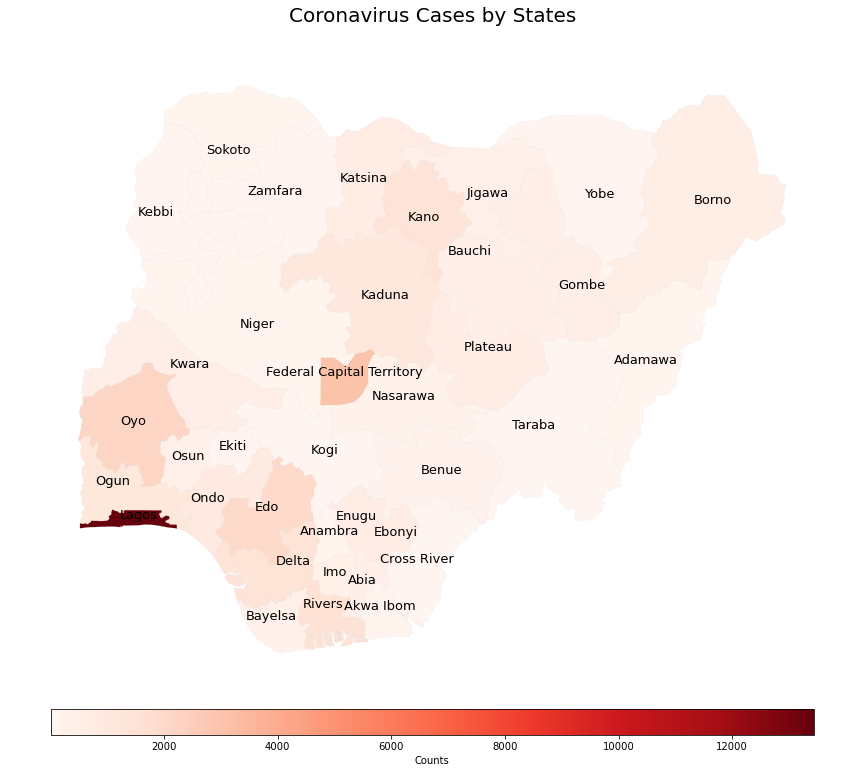

In [35]:
# Plot geomap for cases
visual(data, 'Cases', 'Reds')

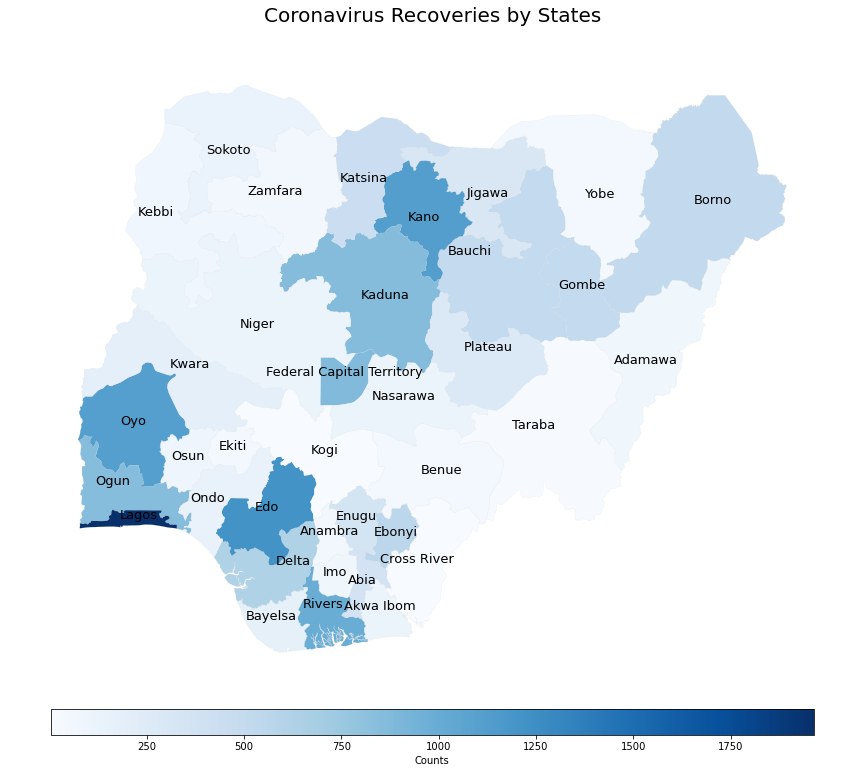

In [36]:
# Plot geomap for recoveries
visual(data, 'Recoveries', 'Blues')

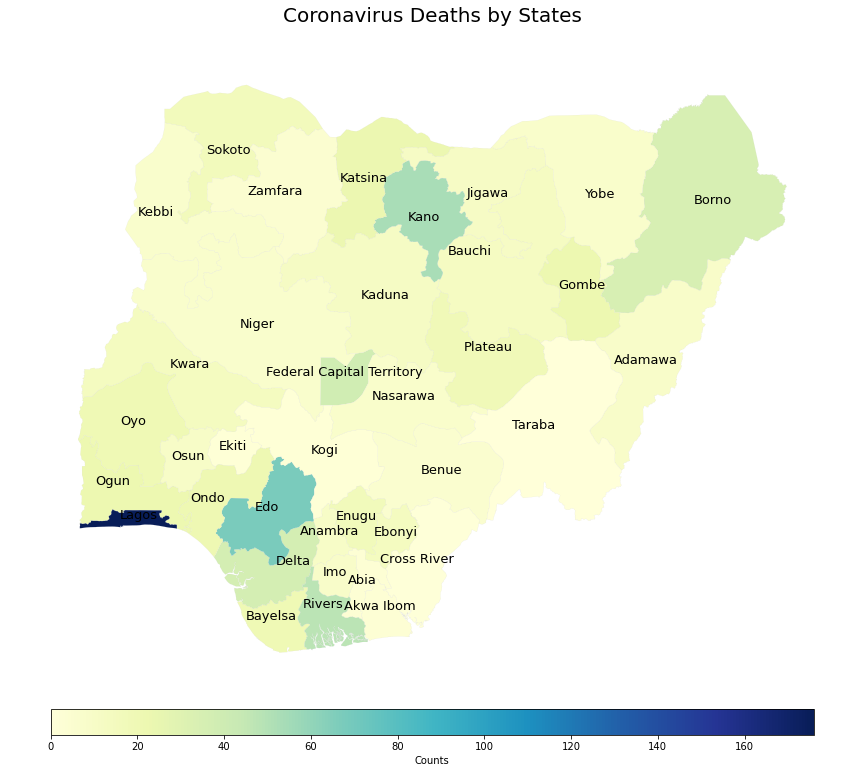

In [37]:
# Plot geomap for deaths
visual(data, 'Deaths', 'YlGnBu')

<h1 align='center'>Time Series Data</h1>

<p>Download data from Johns Hopkins University (JHU) Center for Systems Science and Engineering's (CSSE) GitHub repository</p>

In [38]:
cases = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [39]:
recovs = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [40]:
deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [41]:
# Read data into data frame
df_cases = pd.read_csv(cases)
df_recovs = pd.read_csv(recovs)
df_deaths = pd.read_csv(deaths)

In [42]:
# Extract confirmed cases data for Nigeria
df_cases.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
df_cases.set_index('Country/Region', inplace=True)
df_cases = df_cases.loc['Nigeria']
df_cases = pd.DataFrame(df_cases)
df_cases.columns = ['Cases']
df_cases = df_cases.loc['2/28/20':]

In [43]:
# Extract recoveries data for Nigeria
df_recovs.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
df_recovs.set_index('Country/Region', inplace=True)
df_recovs = df_recovs.loc['Nigeria']
df_recovs = pd.DataFrame(df_recovs)
df_recovs.columns = ['Recoveries']
df_recovs = df_recovs.loc['2/28/20':]

In [44]:
# Extract death data for Nigeria
df_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
df_deaths.set_index('Country/Region', inplace=True)
df_deaths = df_deaths.loc['Nigeria']
df_deaths = pd.DataFrame(df_deaths)
df_deaths.columns = ['Deaths']
df_deaths = df_deaths.loc['2/28/20':]

In [45]:
# Merge cases, recoveriies and death data into one data frame
time_series = pd.concat([df_cases, df_recovs, df_deaths], axis=1, ignore_index=False)

In [46]:
# Rename columns
time_series.reset_index(inplace=True)
time_series.columns = ['Time', 'Cases', 'Recoveries', 'Deaths']

In [47]:
# Set time column type to datetime

#date = pd.date_range("1 22 2020", periods=time_series.shape[0], freq="D", name="date")
time_series['Time'] = pd.to_datetime(time_series['Time'], errors='coerce')

In [48]:
# Make time column index of the data frame
time_series.set_index('Time', inplace=True)

In [49]:
time_series = time_series.asfreq('D', method = 'ffill')

In [50]:
time_series.head()

,Cases,Recoveries,Deaths
Time,,,
2020-02-28,1,0,0
2020-02-29,1,0,0
2020-03-01,1,0,0
2020-03-02,1,0,0
2020-03-03,1,0,0


In [51]:
# Export time series data to csv
time_series.to_csv('time_series.csv')

In [52]:
# Import libraries for plotting
import seaborn as sns
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

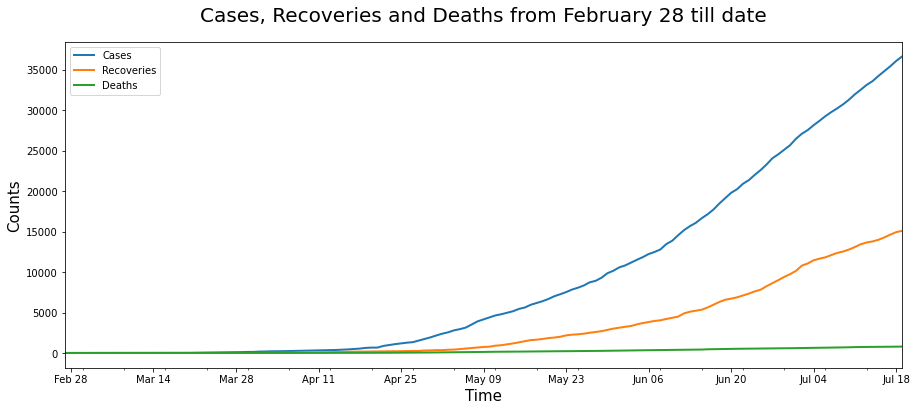

In [53]:
fig, ax = plt.subplots(figsize=(15, 6))
time_series.plot(linewidth=2, ax=ax)
ax.set_title('Cases, Recoveries and Deaths from February 28 till date', fontdict={'fontsize': '20', 'fontweight' : '3'}, pad=20)
ax.set_ylabel('Counts', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Time', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlim(time_series.index[0], time_series.index[-1])

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# Format x-tick labels to show at 2 weeks interval
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# Save figure
plt.savefig('line-plot.png', dpi=150)

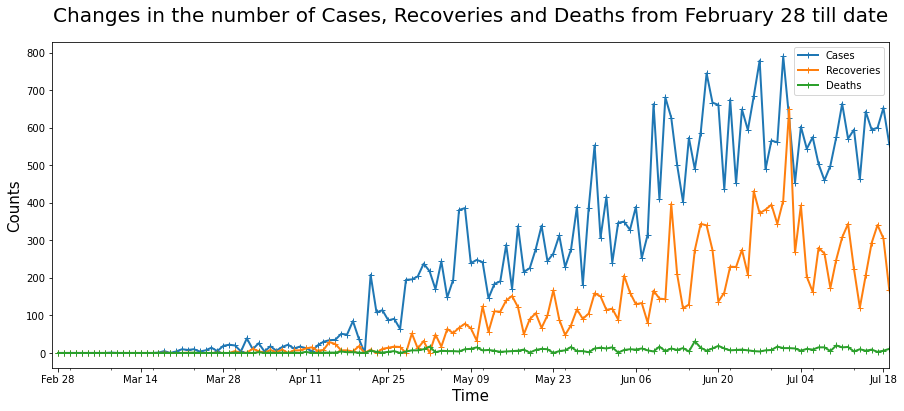

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))
time_series.diff().plot(ax=ax, linewidth=2, marker='+')
ax.set_title('Changes in the number of Cases, Recoveries and Deaths from February 28 till date', fontdict={'fontsize': '20', 'fontweight' : '3'}, pad=20)
ax.set_ylabel('Counts', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Time', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlim(time_series.index[0], time_series.index[-1])

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# Format x-tick labels to show at 2 weeks interval
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# Save figure
plt.savefig('time-lag.png', dpi=150)